### Setup

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fmena14/volcanoesvenus")

print("Path to dataset files:", path)

Path to dataset files: /Users/gabrieledurante/.cache/kagglehub/datasets/fmena14/volcanoesvenus/versions/1


In [11]:
import os

files = os.listdir(path)
print(files)

['Volcanoes_train', 'Volcanoes_test']


### Data Preparation

In [12]:
import numpy as np
import pandas as pd

import os
print(os.listdir(path))

X_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_images.csv'))
y_train = pd.read_csv(os.path.join(path, 'volcanoes_train', 'train_labels.csv'))
X_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_images.csv'))
y_test = pd.read_csv(os.path.join(path, 'volcanoes_test', 'test_labels.csv'))

['Volcanoes_train', 'Volcanoes_test']


In [13]:
print(X_train.head())
print(y_train.head())

    95  101   99  103  95.1   86   96   89   70  104  ...  111.214  107.329  \
0   91   92   91   89    92   93   96  101  107  104  ...      103       92   
1   87   70   72   74    84   78   93  104  106  106  ...       84       71   
2    0    0    0    0     0    0    0    0    0    0  ...       94       81   
3  114  118  124  119    95  118  105  116  123  112  ...      116      113   
4   79   95   90   82    73   74   77   75   82   87  ...       90       80   

   92.354  89.258  103.379  99.414  117.112  116.103  118.82  96.423  
0      93      95       98     105      104      100      90      81  
1      95     102       94      80       91       80      84      90  
2      89      84       80      90       92       80      88      96  
3     102      93      109     104      106      117     111     115  
4      79      78       65      71       62       97      89      73  

[5 rows x 12100 columns]
   Volcano?  Type  Radius  Number Volcanoes
0         1   3.0   17.46    

In [14]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (6999, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2733, 12100) 
y_test shape:	 (2734, 4)


In [15]:
def XFix(X):
    X.loc[-1] = X.columns.values.astype(float).astype(int)  # adding column names as a new row
    X.index = X.index + 1  # shifting index
    X.sort_index(inplace=True)  # sorting the index

XFix(X_train)
XFix(X_test)

In [16]:
print("X_train shape:\t",X_train.shape,"\ny_train shape:\t",y_train.shape,"\nX_test shape:\t",X_test.shape,"\ny_test shape:\t",y_test.shape)

X_train shape:	 (7000, 12100) 
y_train shape:	 (7000, 4) 
X_test shape:	 (2734, 12100) 
y_test shape:	 (2734, 4)


### Some statistics (?)

### Visualization

In [27]:
import warnings

y_train_copy = y_train.copy(deep=True)
X_train_copy = X_train.copy(deep=True)

X_train_copy = np.resize(X_train_copy, (7000, 110, 110))

y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
y_train_copy.loc[y_train_copy["Type"] == 2, 'Type'] = "Probably Volcano"
y_train_copy.loc[y_train_copy["Type"] == 3, 'Type'] = "Possibly Volcano"
y_train_copy.loc[y_train_copy["Type"] == 4, 'Type'] = "Only Pit is Visible"

y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
y_train_copy.loc[y_train_copy["Volcano?"] == 1, 'Volcano?'] = "Volcano"

y_train_copy.loc[y_train_copy["Number Volcanoes"] == 1, 'Number Volcanoes'] = "One Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 2, 'Number Volcanoes'] = "Two Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 3, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 4, 'Number Volcanoes'] = "Three or More Volcano"
y_train_copy.loc[y_train_copy["Number Volcanoes"] == 5, 'Number Volcanoes'] = "Three or More Volcano"

warnings.filterwarnings("ignore", category=DeprecationWarning)

/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_6600/1774235639.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Definitely Volcano' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Type"] == 1, 'Type'] = "Definitely Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_6600/1774235639.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not Volcano' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_train_copy.loc[y_train_copy["Volcano?"] == 0, 'Volcano?'] = "Not Volcano"
/var/folders/mh/vygn38qn06z8b_ms648150t80000gn/T/ipykernel_6600/1774235639.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'One 

In [24]:
from matplotlib import pyplot as plt

def draw_images(feature):
    featureTypes = (y_train_copy.groupby([feature])[feature].nunique()).index
    f, ax = plt.subplots(len(featureTypes)*2, 5, figsize=(12,6*len(featureTypes)))
    for i in range(len(featureTypes)*2):
        typ = featureTypes[int(i/2)]
        sample = y_train_copy[y_train_copy[feature]==typ].sample(5)
        for j in range(5):
            imageIndex = sample.iloc[j].name
            image = X_train_copy[imageIndex]
            ax[i, j].imshow(image, resample=True)
            ax[i, j].set_title(typ, fontsize=13)
    plt.tight_layout()
    plt.show()

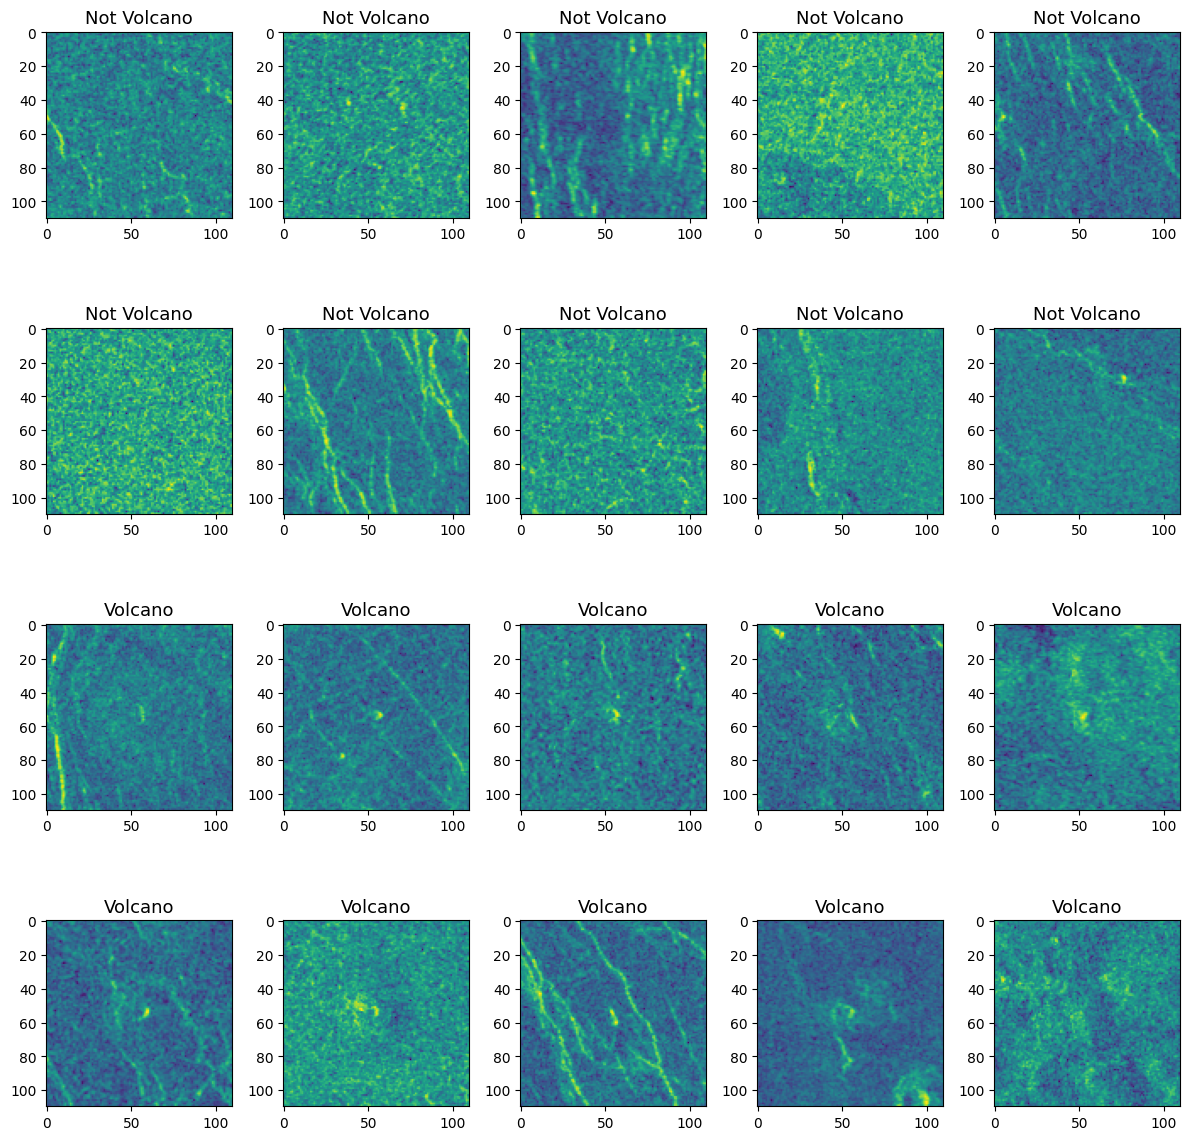

In [19]:
draw_images("Volcano?")

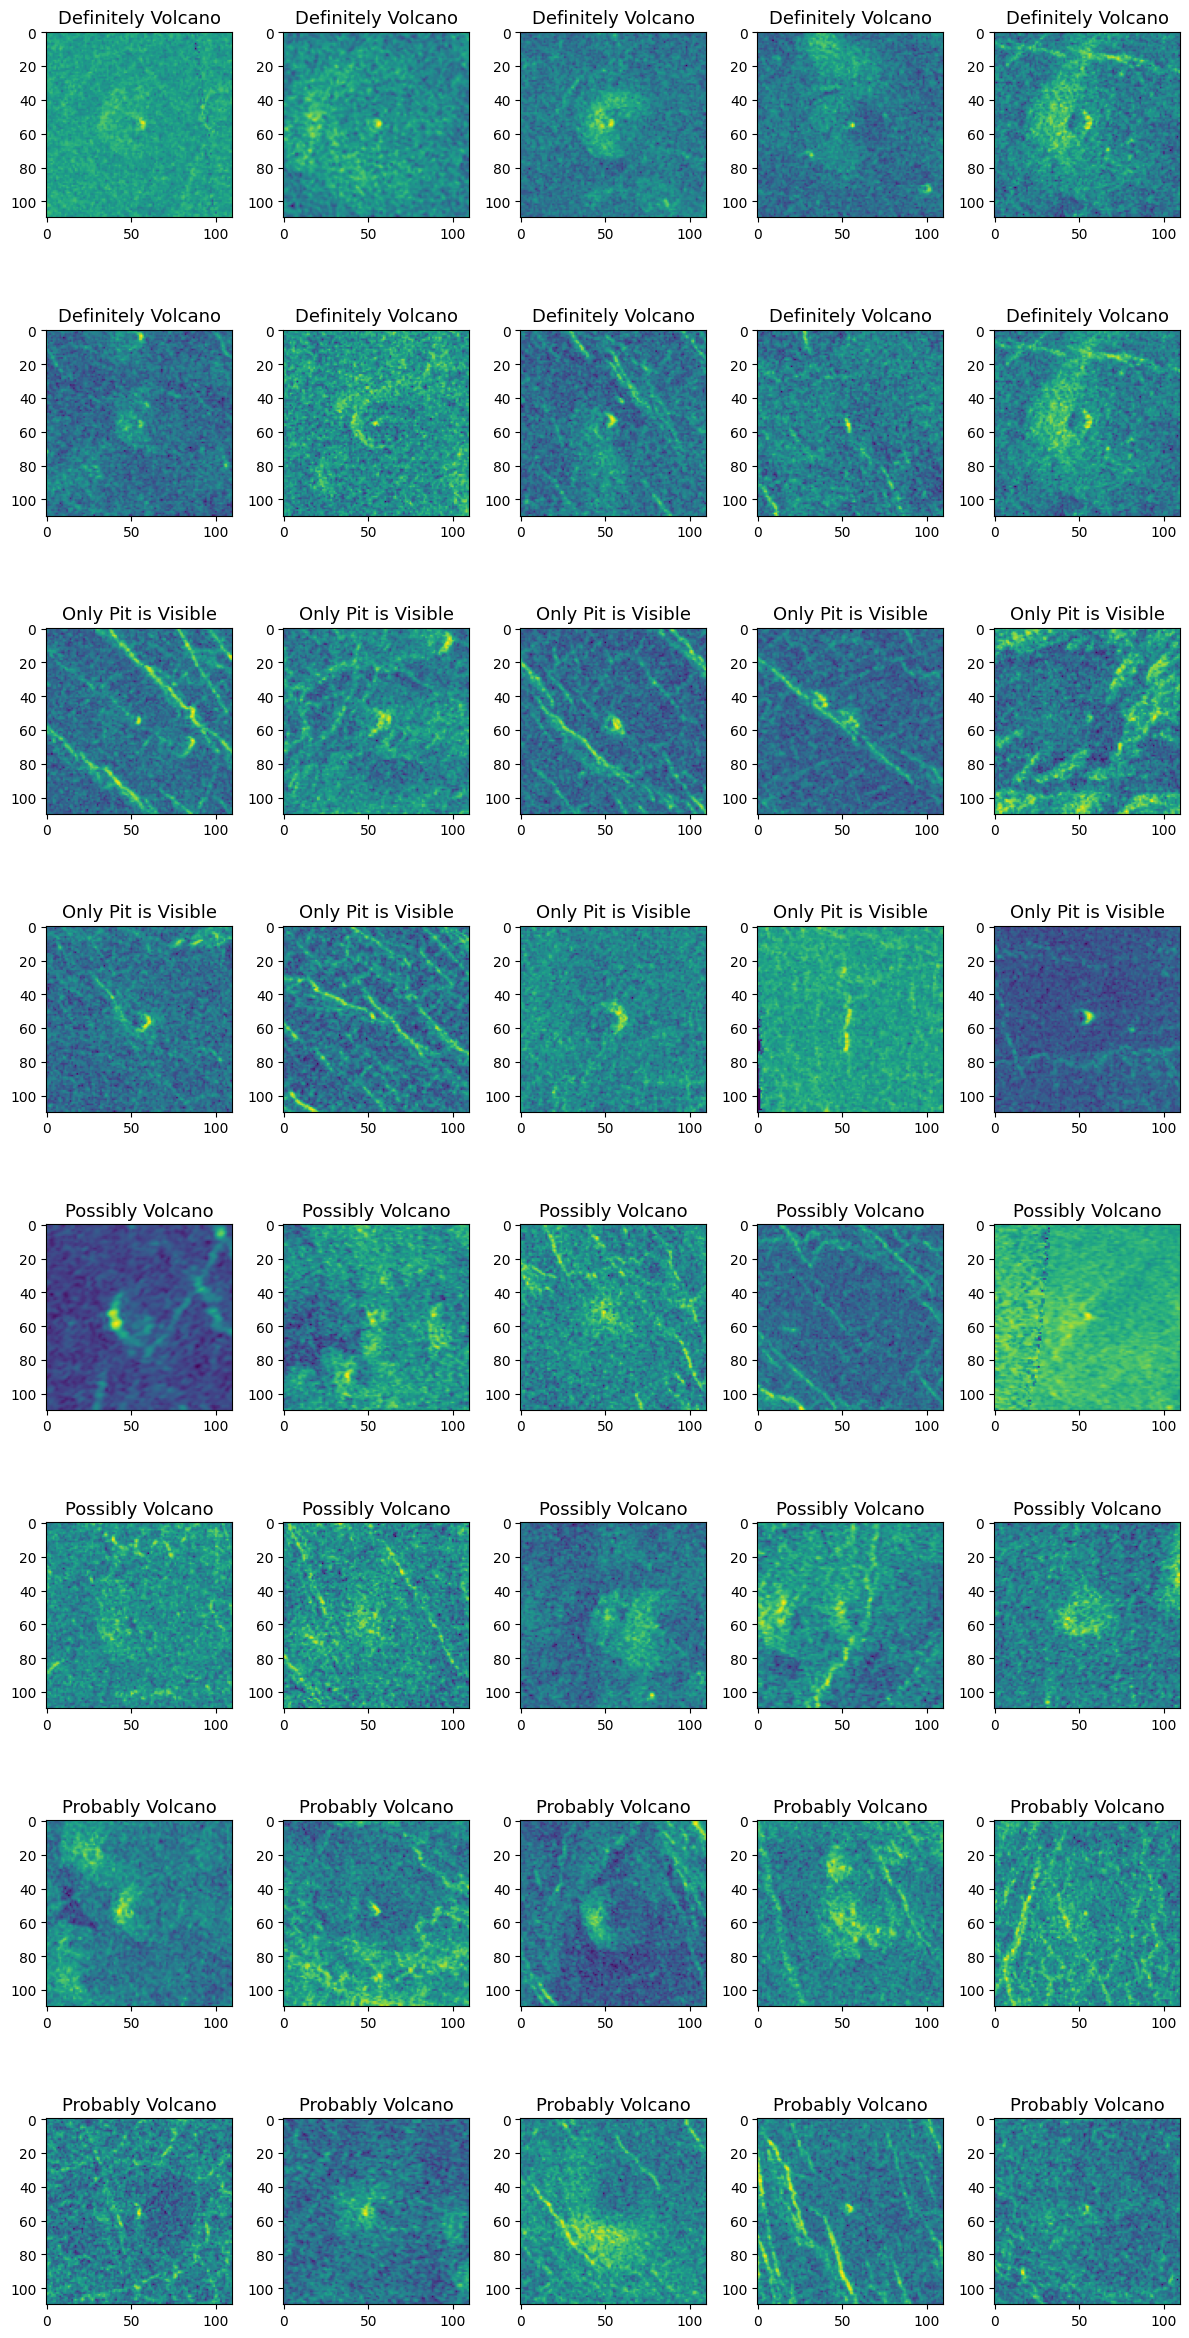

In [20]:
draw_images("Type")

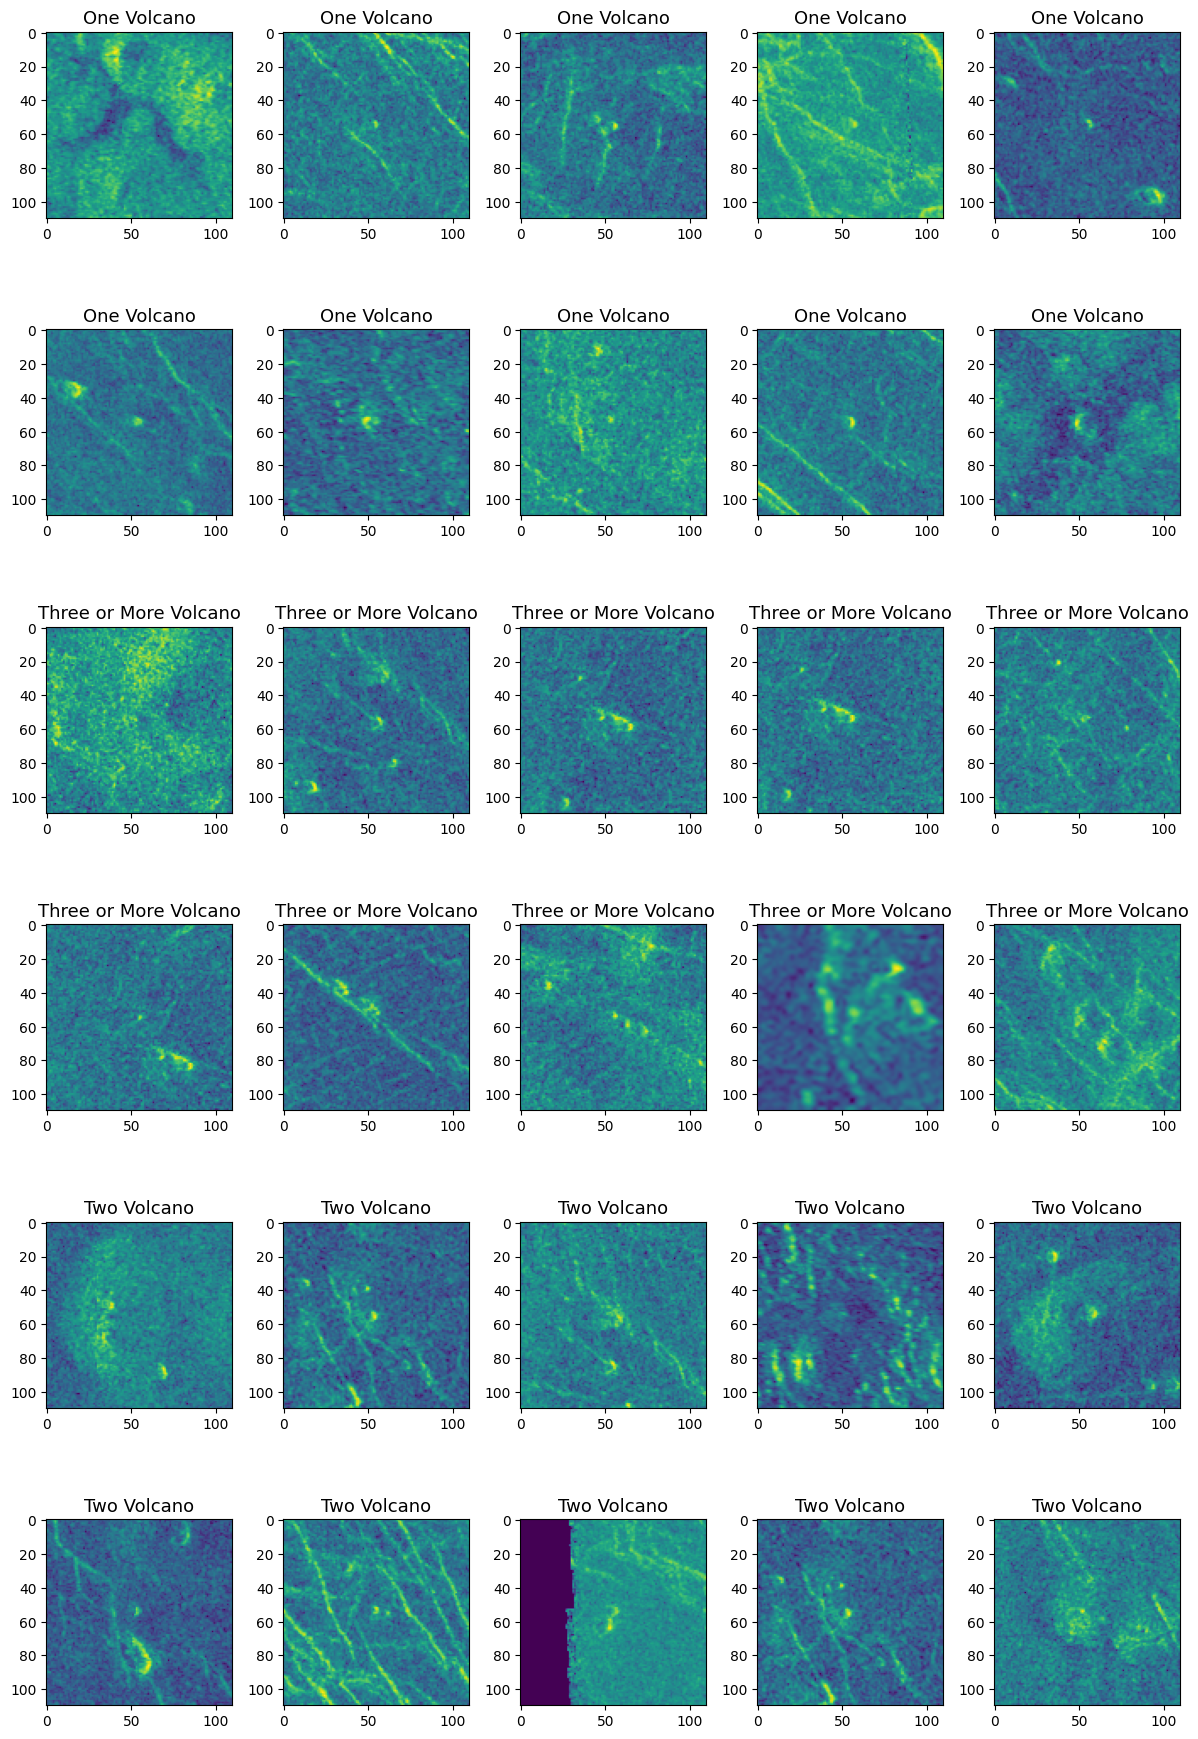

In [25]:
draw_images("Number Volcanoes")